In [1]:
import xarray as xr
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calendar
import hvplot.xarray
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
hot_obs = xr.load_dataset("../1_1_Forcing/data/1_products/Hot_obs.zarr", engine="zarr")
bats_obs = xr.load_dataset("../1_1_Forcing/data/1_products/Bats_obs.zarr", engine="zarr")
papa_obs = xr.load_dataset("../1_1_Forcing/data/1_products/Papa_obs.zarr", engine="zarr")
calcofi_obs = xr.load_dataset("../1_1_Forcing/data/1_products/Calcofi_obs.zarr", engine="zarr")

In [3]:
calcofi_obs = calcofi_obs.sel(time=slice("1995", "2020"))
bats_obs = bats_obs.sel(time=slice("1995", "2020"))
papa_obs = papa_obs.sel(time=slice("1995", "2020"))
hot_obs = hot_obs.sel(time=slice("1995", "2020"))

In [4]:
calcofi_nb_of_months = (calcofi_obs.time.max().dt.year - calcofi_obs.time.min().dt.year) * 12
bats_nb_of_months = (bats_obs.time.max().dt.year - bats_obs.time.min().dt.year) * 12
papa_nb_of_months = (papa_obs.time.max().dt.year - papa_obs.time.min().dt.year) * 12
hot_nb_of_months = (hot_obs.time.max().dt.year - calcofi_obs.time.min().dt.year) * 12
print(f"calcofi_nb_of_months: {int(calcofi_nb_of_months)}")
print(f"bats_nb_of_months: {int(bats_nb_of_months)}")
print(f"papa_nb_of_months: {int(papa_nb_of_months)}")
print(f"hot_nb_of_months: {int(hot_nb_of_months)}")

calcofi_nb_of_months: 300
bats_nb_of_months: 300
papa_nb_of_months: 300
hot_nb_of_months: 300


In [51]:
calcofi_nb_of_year = calcofi_obs.time.max().dt.year - calcofi_obs.time.min().dt.year
bats_nb_of_year = bats_obs.time.max().dt.year - bats_obs.time.min().dt.year
papa_nb_of_year = papa_obs.time.max().dt.year - papa_obs.time.min().dt.year
hot_nb_of_year = hot_obs.time.max().dt.year - calcofi_obs.time.min().dt.year
print(f"calcofi_nb_of_year: {int(calcofi_nb_of_year)}")
print(f"bats_nb_of_year: {int(bats_nb_of_year)}")
print(f"papa_nb_of_year: {int(papa_nb_of_year)}")
print(f"hot_nb_of_year: {int(hot_nb_of_year)}")

calcofi_nb_of_year: 25
bats_nb_of_year: 25
papa_nb_of_year: 25
hot_nb_of_year: 25


In [5]:
calcofi_spatial_counts = (calcofi_obs > 0).sum(["time", "layer"])
calcofi_spatial_counts = calcofi_spatial_counts.day + calcofi_spatial_counts.night
calcofi_spatial_counts = calcofi_spatial_counts.where(calcofi_spatial_counts > 0, np.nan)
calcofi_spatial_counts = calcofi_spatial_counts / calcofi_nb_of_months

papa_spatial_counts = (papa_obs > 0).sum(["time", "layer"])
papa_spatial_counts = papa_spatial_counts.day + papa_spatial_counts.night
papa_spatial_counts = papa_spatial_counts.where(papa_spatial_counts > 0, np.nan)
papa_spatial_counts = papa_spatial_counts / papa_nb_of_months

bats_spatial_counts = (bats_obs > 0).sum(["time", "layer"])
bats_spatial_counts = bats_spatial_counts.day + bats_spatial_counts.night
bats_spatial_counts = bats_spatial_counts.where(bats_spatial_counts > 0, np.nan)
bats_spatial_counts = bats_spatial_counts / bats_nb_of_months

hot_spatial_counts = (hot_obs > 0).sum(["time", "layer"])
hot_spatial_counts = hot_spatial_counts.day + hot_spatial_counts.night
hot_spatial_counts = hot_spatial_counts.where(hot_spatial_counts > 0, np.nan)
hot_spatial_counts = hot_spatial_counts / hot_nb_of_months

In [6]:
spatial_counts_total = (xr.concat([hot_obs, bats_obs, papa_obs, calcofi_obs], dim="time") > 0).sum(["time", "layer"])
spatial_counts_total = spatial_counts_total.day + spatial_counts_total.night
spatial_counts_total = spatial_counts_total.where(spatial_counts_total > 0, np.nan)

spatial_counts_month = xr.concat(
    [calcofi_spatial_counts, papa_spatial_counts, bats_spatial_counts, hot_spatial_counts], dim="time"
)

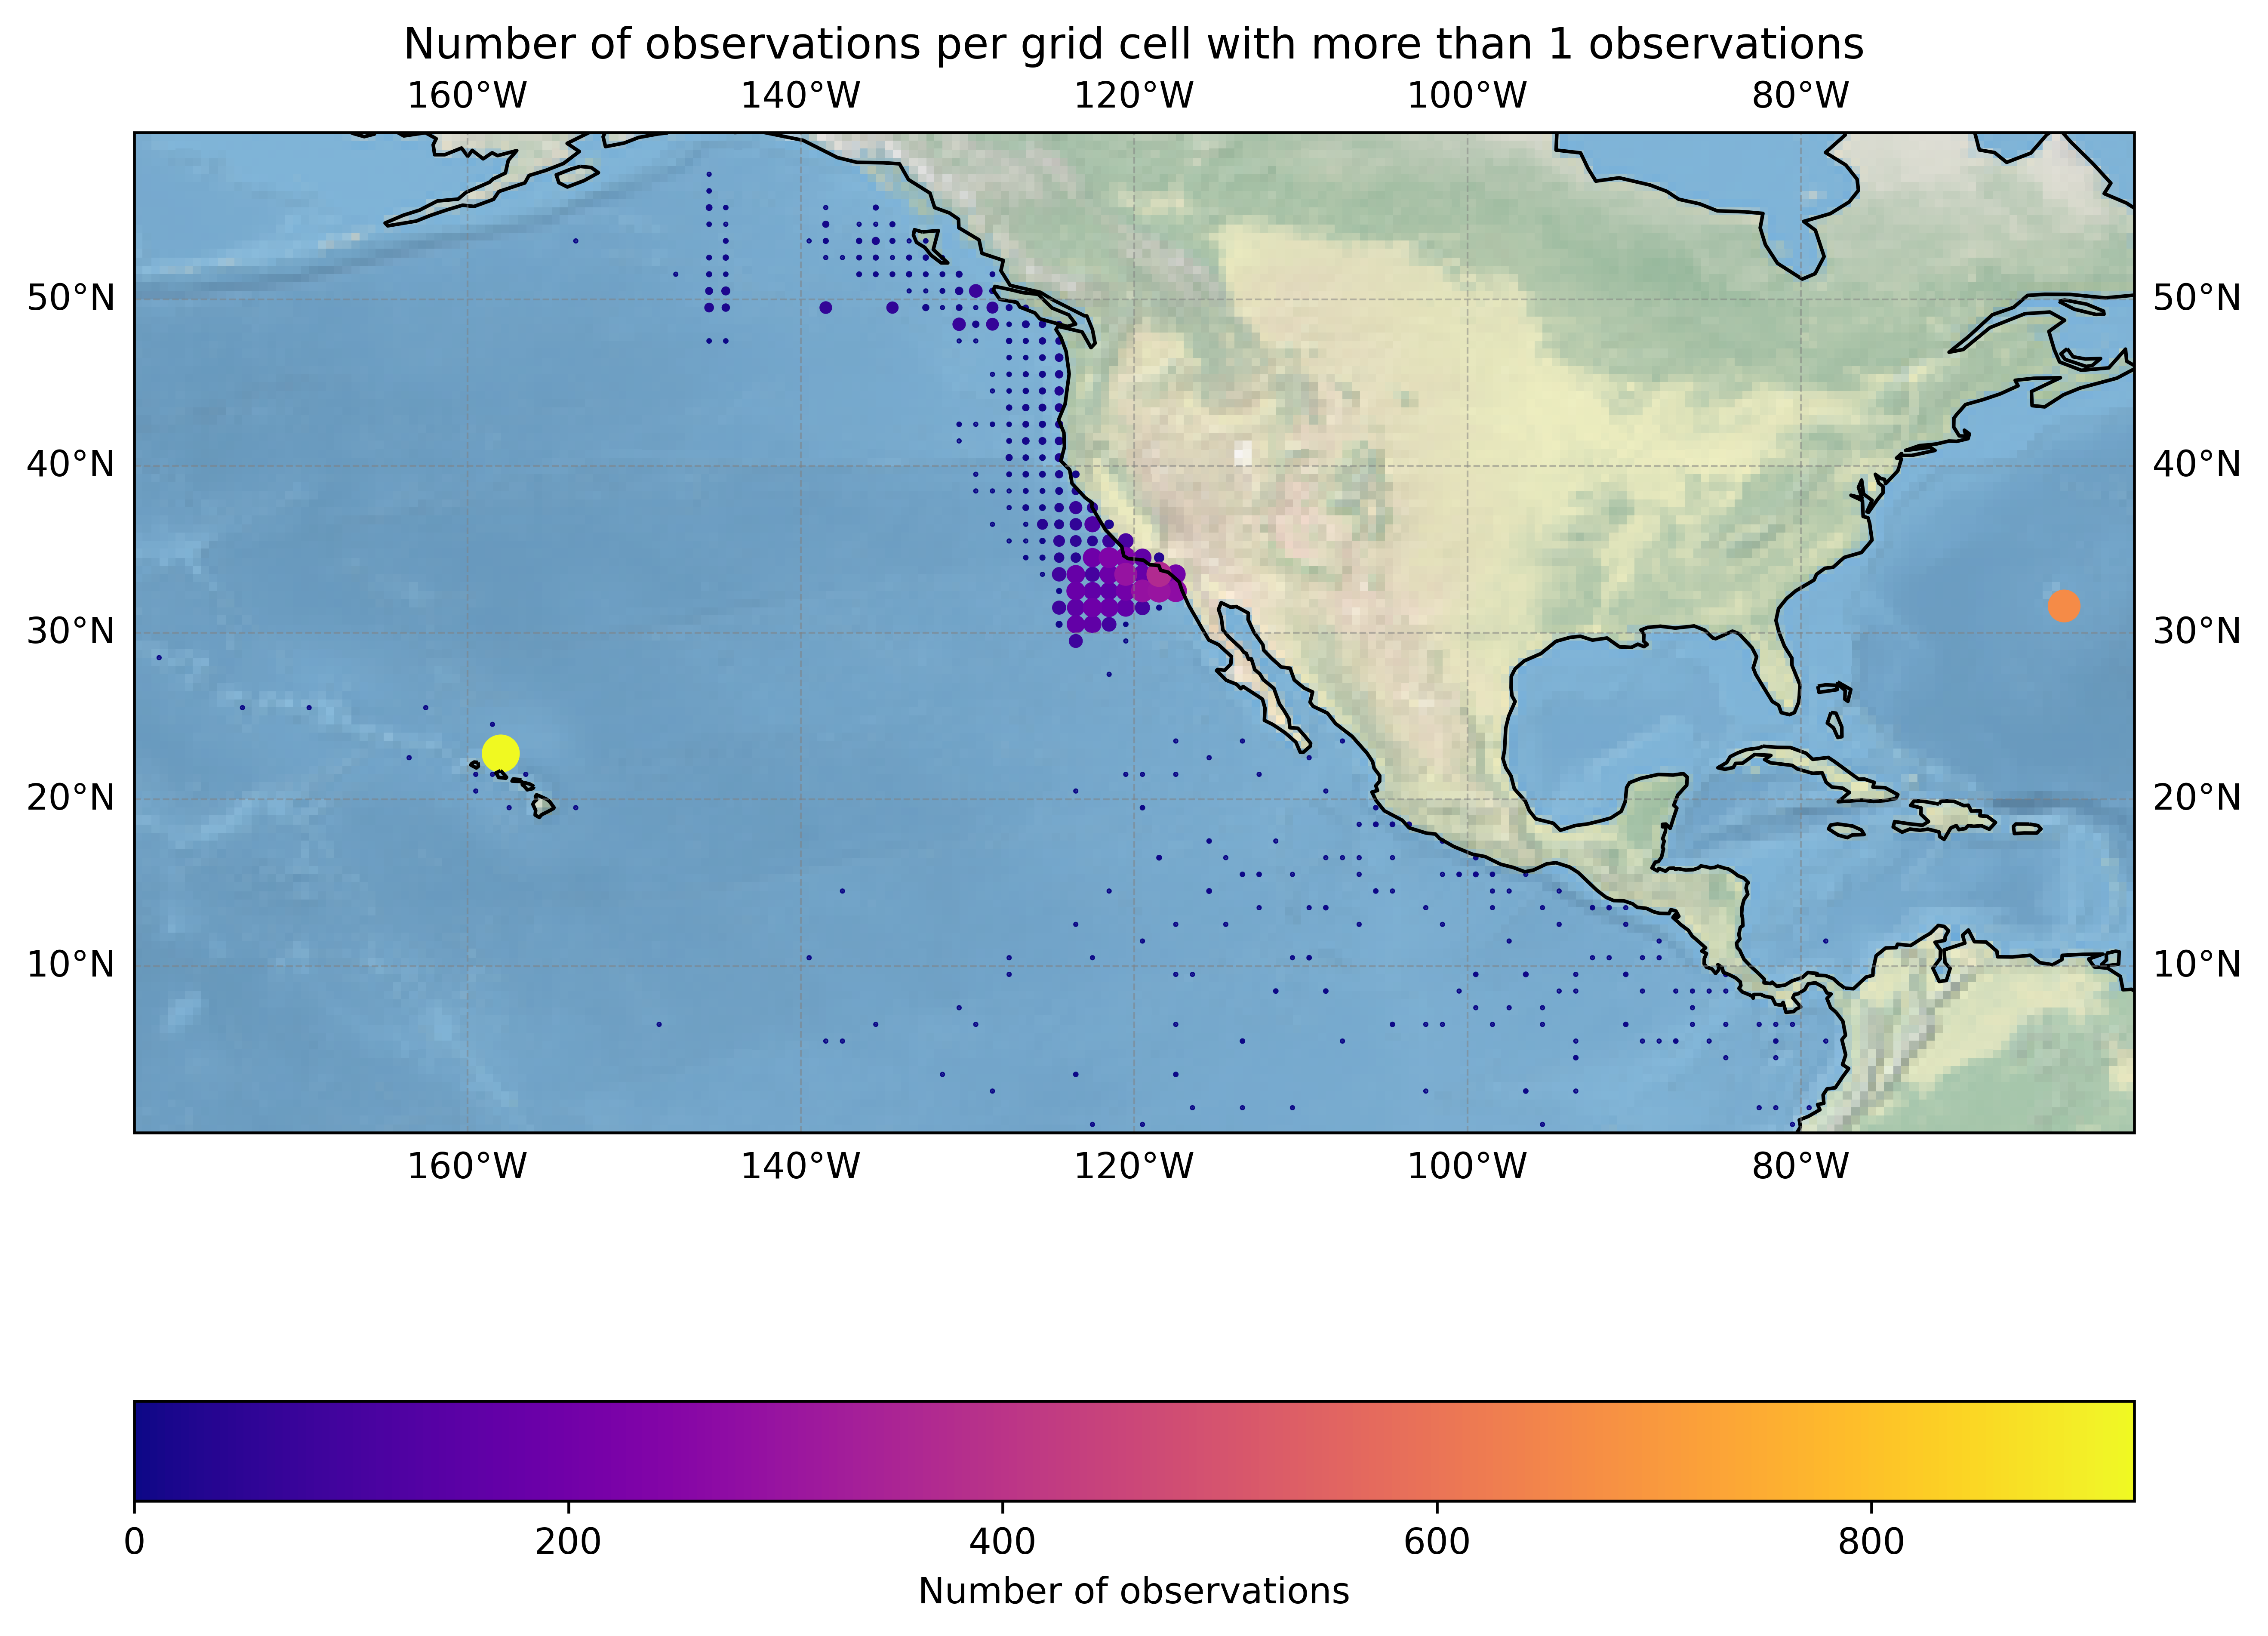

In [7]:
test = (
    spatial_counts_total.to_series()
    .dropna()
    .rename("obs_counts")
    .reset_index()
    .sort_values("obs_counts", ascending=True)
    .query("obs_counts > 1")
)
figure = plt.figure(figsize=(10, 9), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-140))
ax.coastlines()
# ax.set_extent([-180, -60, 10, 60], ccrs.PlateCarree())
ax.set_extent([-180, -60, 0, 60], ccrs.PlateCarree())
ax.stock_img()
scatter = ax.scatter(
    test["longitude"],
    test["latitude"],
    s=test["obs_counts"] * 0.1,
    c=test["obs_counts"],
    cmap="plasma",
    vmin=0,  # Limite minimale
    vmax=None,  # Limite maximale
    transform=ccrs.PlateCarree(),
)
ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
cb = plt.colorbar(
    scatter,
    label="Number of observations",
    orientation="horizontal",
    # shrink=0.5,
)
plt.title("Number of observations per grid cell with more than 1 observations")
plt.show()

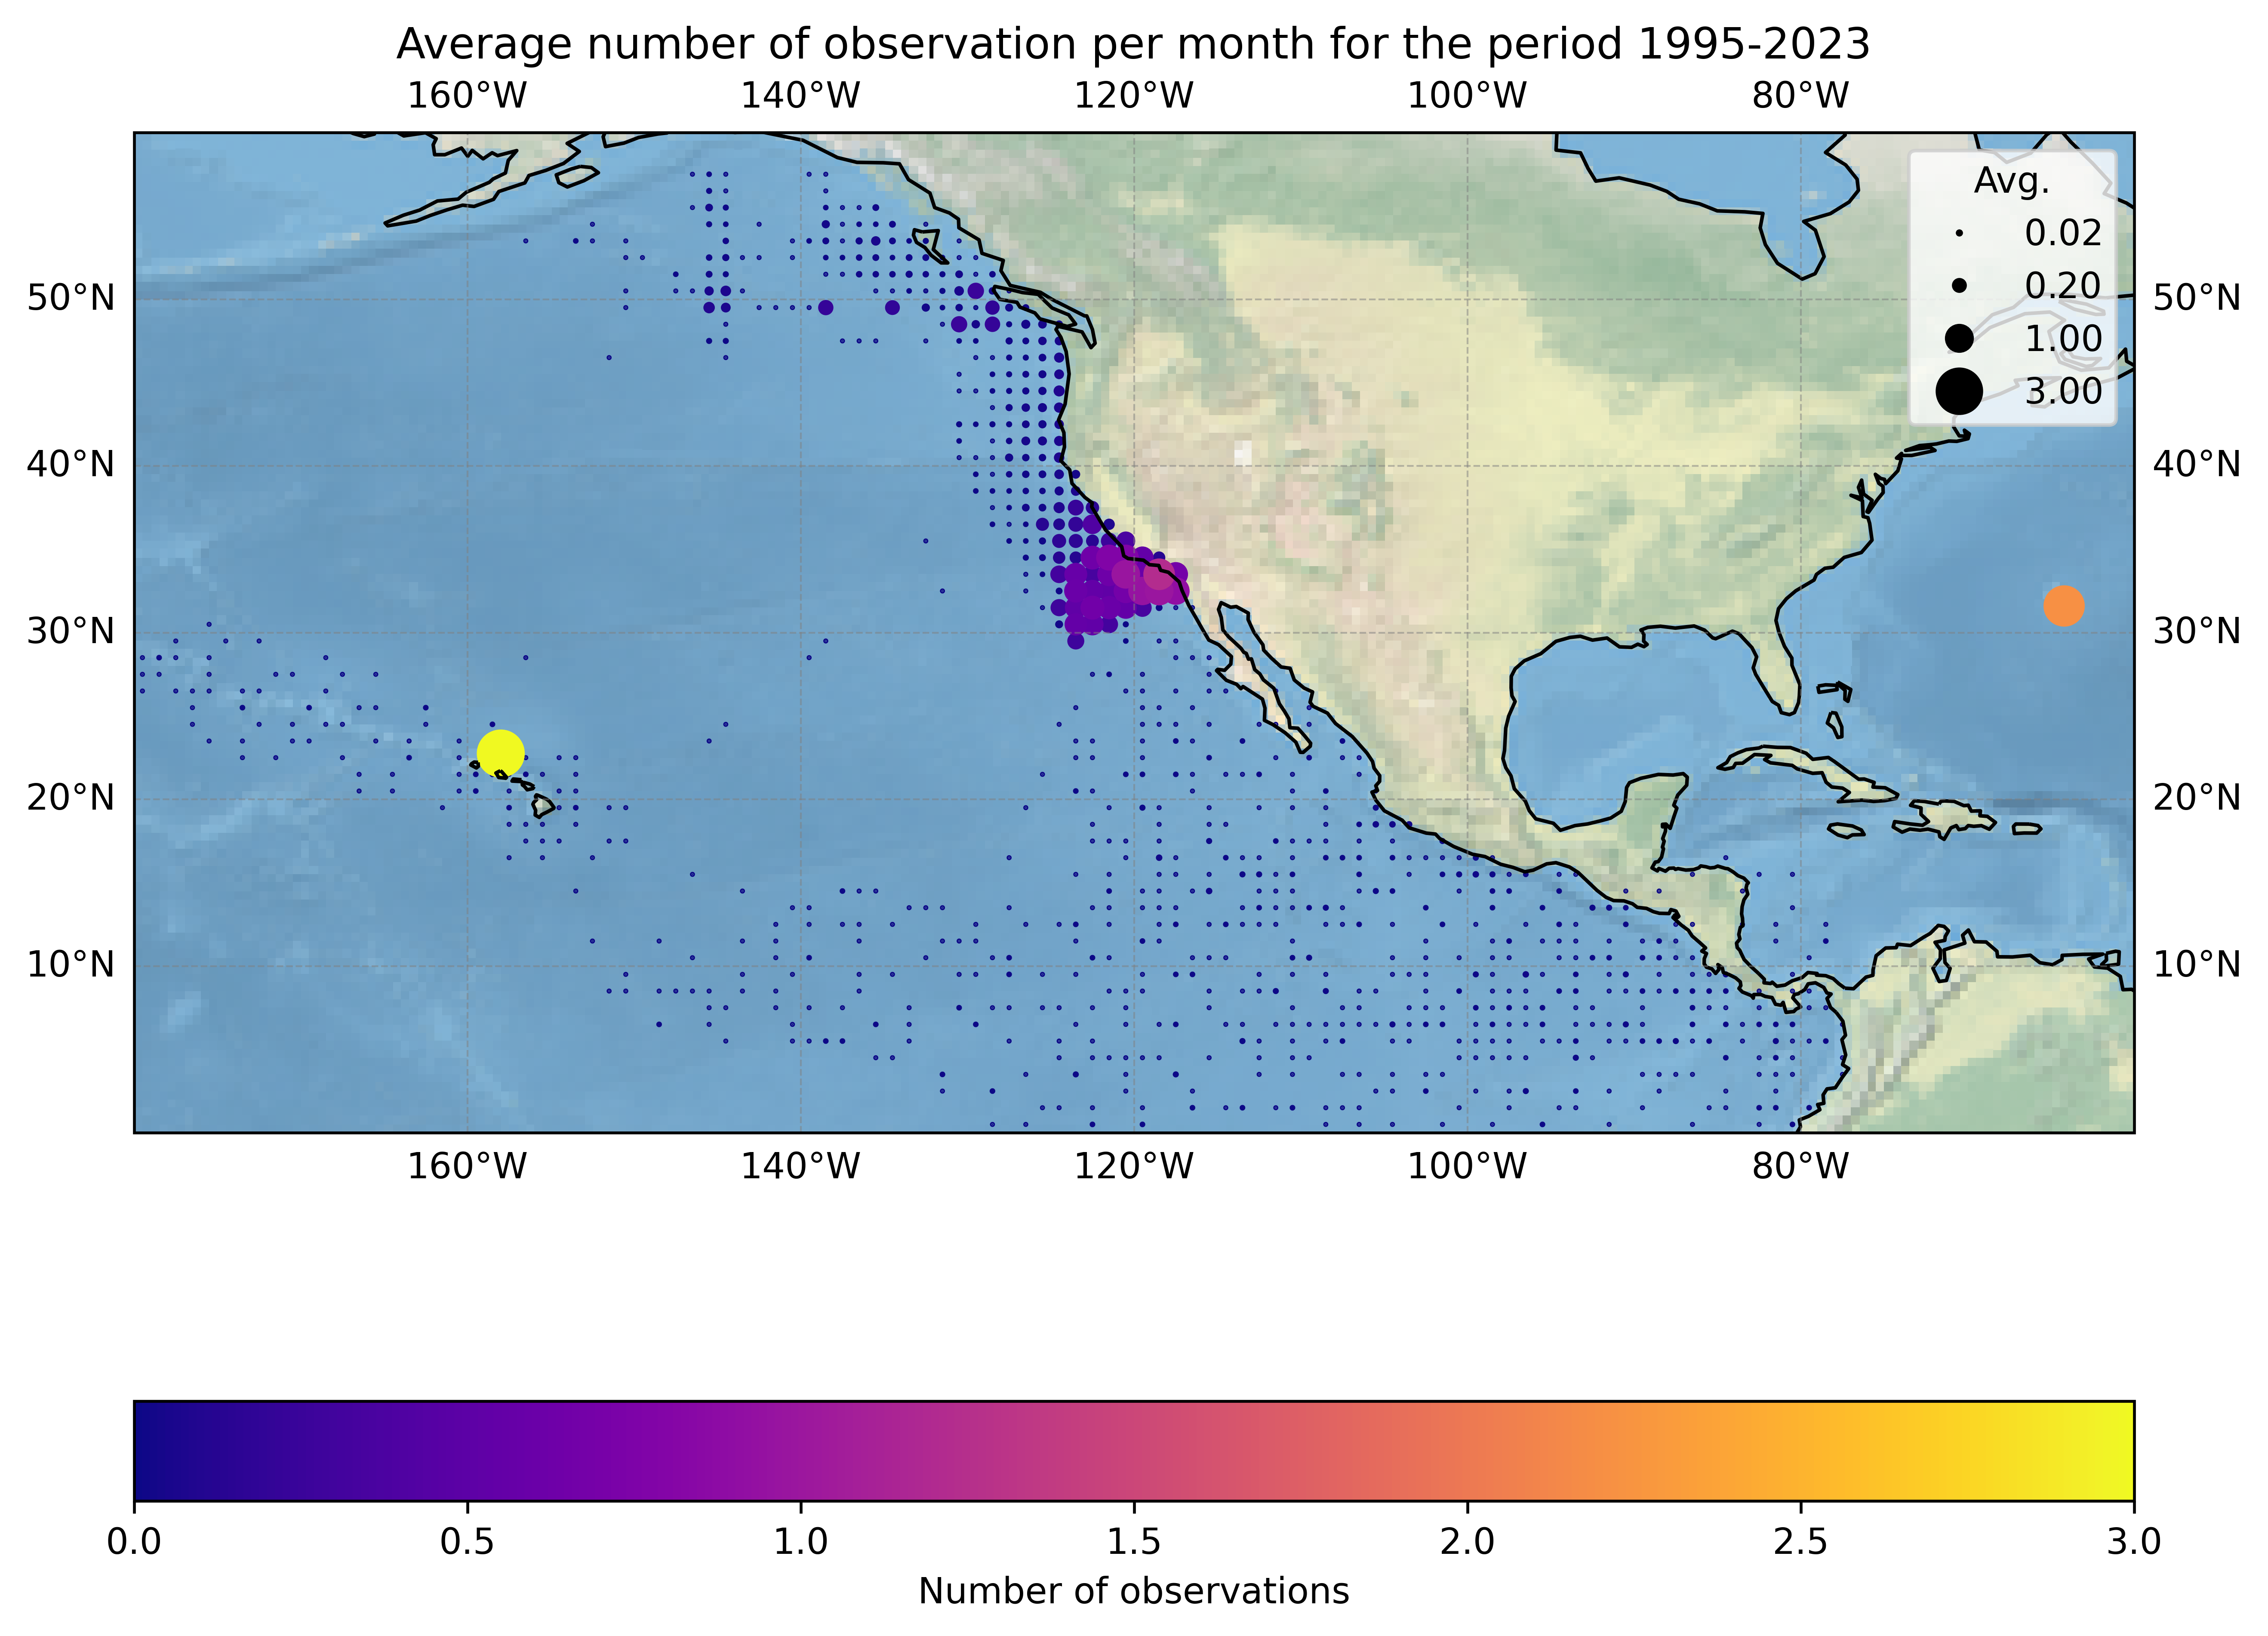

In [8]:
test = (
    spatial_counts_month.to_series()
    .dropna()
    .rename("obs_counts")
    .reset_index()
    .sort_values("obs_counts", ascending=True)
    # .query("obs_counts >= 1")
)

scale_factor = 50

figure = plt.figure(figsize=(10, 9), dpi=600)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-140))
ax.coastlines()
# ax.set_extent([-180, -60, 10, 60], ccrs.PlateCarree())
ax.set_extent([-180, -60, 0, 60], ccrs.PlateCarree())
ax.stock_img()
scatter = ax.scatter(
    test["longitude"],
    test["latitude"],
    s=test["obs_counts"] * scale_factor,
    c=test["obs_counts"],
    cmap="plasma",
    vmin=0,  # Limite minimale
    vmax=3,  # Limite maximale
    transform=ccrs.PlateCarree(),
    # pas de taille minimum
)
ax.gridlines(draw_labels=True, linewidth=0.5, color="gray", alpha=0.5, linestyle="--")
cb = plt.colorbar(
    scatter,
    label="Number of observations",
    orientation="horizontal",
    # shrink=0.5,
)
# je veux une légende avec les tailles
# scatter.set_array(test["obs_counts"])
# plt.legend(*scatter.legend_elements(), title="Obs counts")
plt.legend(*scatter.legend_elements("sizes", num=[0.02, 0.2, 1, 3], func=lambda s: s / scale_factor), title="Avg.")

plt.title("Average number of observation per month for the period 1995-2023")
plt.show()

In [52]:
monthly_by_station = {}
for station, name, nb_year in zip(
    [hot_obs, bats_obs, papa_obs, calcofi_obs],
    ["hot", "bats", "papa", "calcofi"],
    [hot_nb_of_year, bats_nb_of_year, papa_nb_of_year, calcofi_nb_of_year],
):
    monthly_by_station[name] = station.groupby("time.month").count()
    monthly_by_station[name] = monthly_by_station[name].where(monthly_by_station[name] > 0)
    monthly_by_station[name] = (
        monthly_by_station[name].dropna("month", how="all").dropna("latitude", how="all").dropna("longitude", how="all")
    )
    monthly_by_station[name] = monthly_by_station[name].day + monthly_by_station[name].night
    monthly_by_station[name] = monthly_by_station[name] / nb_year
    monthly_by_station[name] = monthly_by_station[name].mean(["latitude", "longitude", "layer"])
monthly_by_station = xr.Dataset(monthly_by_station).to_dataframe().reset_index()
monthly_by_station["month"] = monthly_by_station["month"].apply(lambda x: calendar.month_name[x][:3])
monthly_by_station

,month,hot,bats,papa,calcofi
0,Jan,2.56,1.60,0.080000,1.036364
1,Feb,3.04,2.80,0.453333,0.467273
2,Mar,2.84,3.00,0.080000,0.281538
3,Apr,2.92,3.20,NaN,0.975135
4,May,3.64,1.84,0.346667,0.162857
5,Jun,2.92,2.04,0.290000,0.144000
6,Jul,3.16,2.28,0.185455,0.743571
7,Aug,3.48,1.88,0.422222,0.354783
8,Sep,2.32,1.96,0.250667,0.164211
9,Oct,3.68,1.96,0.180000,0.625143


In [53]:
yearly_by_station = {}
for station, name in zip([hot_obs, bats_obs, papa_obs, calcofi_obs], ["hot", "bats", "papa", "calcofi"]):
    yearly_by_station[name] = station.groupby("time.year").count()
    yearly_by_station[name] = yearly_by_station[name].where(yearly_by_station[name] > 0)
    yearly_by_station[name] = (
        yearly_by_station[name].dropna("year", how="all").dropna("latitude", how="all").dropna("longitude", how="all")
    )
    yearly_by_station[name] = yearly_by_station[name].day + yearly_by_station[name].night
    yearly_by_station[name] = yearly_by_station[name].sum(["latitude", "longitude", "layer"])
yearly_by_station = xr.Dataset(yearly_by_station).to_dataframe()  # .reset_index()
# yearly_by_station["year"] = yearly_by_station["year"].apply(lambda x: calendar.year_name[x][:3])
yearly_by_station

,hot,bats,papa,calcofi
year,,,,
1995,29.0,15.0,6.0,204.0
1996,30.0,31.0,0.0,213.0
1997,33.0,30.0,13.0,153.0
1998,40.0,30.0,36.0,309.0
1999,36.0,31.0,12.0,201.0
2000,44.0,20.0,24.0,218.0
2001,35.0,25.0,27.0,217.0
2002,33.0,31.0,15.0,229.0
2003,42.0,28.0,9.0,267.0


In [57]:
figure = make_subplots(
    rows=1,
    cols=4,
    specs=[[{"type": "barpolar"}] * 4],
    subplot_titles=["Hot", "Bats", "Calcofi", "Papa"],
)

for i, station in enumerate(["hot", "bats", "calcofi", "papa"]):
    figure.add_trace(
        go.Barpolar(
            r=monthly_by_station[station],
            theta=monthly_by_station["month"],
            name=station.capitalize(),
            marker_color=px.colors.qualitative.Plotly[i],
        ),
        row=1,
        col=i + 1,
    )
# figure.update_traces(texttemplate="%{r}", textfont_size=12)
figure.update_layout(
    title_text="Average number of observations per month",
    title_font_size=25,
    showlegend=False,
    font=dict(size=16),
    margin=dict(l=35, r=35, t=75, b=35),
    height=550,
    # change la range des valeurs
    # polar1={"radialaxis": {"range": [0, 0.4]}},
    # polar2={"radialaxis": {"range": [0, 0.4]}},
    # polar3={"radialaxis": {"range": [0, 0.15]}},
    # polar4={"radialaxis": {"range": [0, 0.15]}},
)
figure.show()

In [58]:
figure = make_subplots(
    rows=4,
    cols=1,
    subplot_titles=["Hot", "Bats", "Papa", "Calcofi"],
    specs=[[{"type": "bar"}] for _ in range(4)],
    vertical_spacing=0.05,
    shared_xaxes=True,
)

for i, station in enumerate(["hot", "bats", "papa", "calcofi"]):
    figure.add_trace(
        go.Bar(
            y=monthly_by_station[station],
            x=monthly_by_station["month"],
            name=station.capitalize(),
            marker_color=px.colors.qualitative.Plotly[i],
        ),
        row=i + 1,
        col=1,
    )
figure.update_layout(
    title_text="Average number of observations per month",
    title_font_size=25,
    showlegend=False,
    font={"size": 20},
    margin={"l": 35, "r": 35, "t": 75, "b": 35},
    height=750,
    # bigger font for subtitles
    annotations=[
        {"text": "HOT", "font": dict(size=25)},
        {"text": "BATS", "font": dict(size=25)},
        {"text": "PAPA", "font": dict(size=25)},
        {"text": "CALCOFI", "font": dict(size=25)},
    ],
)
figure.show()

In [14]:
figure = make_subplots(
    rows=4,
    cols=1,
    subplot_titles=["Hot", "Bats", "Papa", "Calcofi"],
    specs=[[{"type": "bar"}] for _ in range(4)],
    vertical_spacing=0.05,
    shared_xaxes=True,
)

for i, station in enumerate(["hot", "bats", "papa", "calcofi"]):
    figure.add_trace(
        go.Bar(
            y=yearly_by_station[station],
            x=yearly_by_station[station].index,
            name=station.capitalize(),
            marker_color=px.colors.qualitative.Plotly[i],
        ),
        row=i + 1,
        col=1,
    )
figure.update_layout(
    title_text="Yearly counts of observations",
    title_font_size=25,
    showlegend=False,
    font={"size": 20},
    margin={"l": 35, "r": 35, "t": 75, "b": 35},
    height=750,
    # bigger font for subtitles
    annotations=[
        {"text": "HOT", "font": dict(size=25)},
        {"text": "BATS", "font": dict(size=25)},
        {"text": "PAPA", "font": dict(size=25)},
        {"text": "CALCOFI", "font": dict(size=25)},
    ],
)
figure.show()

In [15]:
figure = make_subplots(
    rows=4,
    cols=1,
    subplot_titles=["Hot", "Bats", "Papa", "Calcofi"],
    specs=[[{"type": "bar"}] for _ in range(4)],
    vertical_spacing=0.05,
    # shared_xaxes=True,
)

for i, station in enumerate(["hot", "bats", "papa", "calcofi"]):
    figure.add_trace(
        go.Bar(
            y=yearly_by_station[station].dropna(),
            x=yearly_by_station[station].dropna().index,
            name=station.capitalize(),
            marker_color=px.colors.qualitative.Plotly[i],
        ),
        row=i + 1,
        col=1,
    )
figure.update_layout(
    title_text="Yearly counts of observations",
    title_font_size=25,
    showlegend=False,
    font={"size": 20},
    margin={"l": 35, "r": 35, "t": 75, "b": 35},
    height=750,
    # bigger font for subtitles
    annotations=[
        {"text": "HOT", "font": {"size": 25}},
        {"text": "BATS", "font": {"size": 25}},
        {"text": "PAPA", "font": {"size": 25}},
        {"text": "CALCOFI", "font": {"size": 25}},
    ],
)
figure.show()